오버샘플링은 훈련데이터만 똑같이 맞춰주는게 좋음              
testset은 불균형한 자체로 냅둬야함

각 집단을 정확하게 나누고 싶다면 svm 을 적용하는 게 좋음                   
데이터가 표준화가 애매하다면 랜덤이나 트리기반으로 가야하긴함

### 분류 회귀(딥러닝 원리)
## 로지스틱 회귀 (분류)
선형모델을 통한 분류기

In [1]:
import pandas as pd
import numpy as np

In [12]:
# 로지스틱 회귀의 원리
def sigmoid(x):
    return 1/(1+np.exp(-x))

x1 = np.array([2,4,6,8])
x2 = np.array([1,2,1,3])
y= [ 0 ,1,0,1] # 0 불합격 /1 합격

a1=0 # 0~1 랜덤값
a2=0 
b=0
lr = 0.01

for n in range(5000):
    y_hat = sigmoid(a1 *x1 + a2 *x2 + b) # 예측선
    error = y_hat - y # 오차
    
    a1_diff = sum(2*error*x1) #a1에 대한 평미분한 값 = 기울기 값
    a2_diff = sum(2*error*x2) #a2에 대한 평미분한 값 = 기울기 값
    b_diff = sum(2*error*b) #b에 대한 평미분한 값 = 기울기 값
    
    a1 -= a1_diff*lr
    a2 -= a2_diff*lr
    b -= b_diff*lr
    
    print(a1_diff, a2_diff, b_diff)

-4.0 -3.0 0.0
-1.0293559806045387 -1.985225367860826 0.0
-0.05523917676436518 -1.6448098884326643 0.0
0.28604802321099143 -1.5180460254106665 0.0
0.40894369515270235 -1.46499763949739 0.0
0.45243195482124143 -1.438776641077963 0.0
0.46643008203139935 -1.4225566863664316 0.0
0.4693953362009946 -1.4101210659607715 0.0
0.4682311719666288 -1.399146532593442 0.0
0.4655313913572243 -1.3887610867130578 0.0
0.4622724047406539 -1.3786369882564835 0.0
0.45882209240182714 -1.3686511137459596 0.0
0.45531910501148154 -1.3587573440564322 0.0
0.4518156778945439 -1.3489385464303645 0.0
0.44833144709631867 -1.339188491733739 0.0
0.444873741002187 -1.329505041015328 0.0
0.44144523585784334 -1.3198875771791825 0.0
0.43804684585043496 -1.310336036677136 0.0
0.4346788149945189 -1.3008505446054877 0.0
0.4313411300715675 -1.2914312774956782 0.0
0.42803367704603357 -1.2820784120782462 0.0
0.42475630048656043 -1.2727921065275534 0.0
0.42150882627949127 -1.2635724939821582 0.0
0.4182910704345604 -1.254419680702

In [14]:
if sigmoid(a1 * 5 + a2 * 1 +b) < 0.5 : #임계값이 0.5로 만들었을 때 # 5시간 공부해서 문제집 1권 풀었을 때
    print('불합격')
else:
    print('합격')

불합격


In [15]:
if sigmoid(a1 * 1 + a2 * 10 +b) < 0.5 : #임계값이 0.5로 만들었을 때 # 1시간 공부해서 문제집 10권 풀었을 때
    print('불합격')
else:
    print('합격')

합격


#### 0220 심화 수업

- softmax에 대해 배움..
로지스틱을 진행함으로써 각 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

# 기본적으로 경사하강법을 기준으로 적용
# 잘 안내려갔다면, 경고창이 뜰거여!
# 안뜨면 제대로 되었다는 것이고, 뜬다면, 학습률을 늘려줘야 함! max_iter=10000
# 데이터가 복잡할 수록 max_iter의 값은 높고, 단순하다면 낮아도 됨.
# 언제까지 max_iter를 늘리냐? 경고창이 안뜰때까지!
lg = LogisticRegression()
lg.fit(train_scaled, train_y)
lg.score(test_scaled, test_y)

1.0

In [4]:
# 0번째는 setosa를 맞추기 위한 선형회귀 모델
# 1번째는 versicolor
# 2번째는 딴 아이 virginica
# 각각의 선형회귀 모델을 파악 가능
lg.coef_

array([[-0.92481676,  1.24382725, -1.6813078 , -1.64043074],
       [ 0.40773663, -0.41203915, -0.29624848, -0.66325362],
       [ 0.51708013, -0.8317881 ,  1.97755628,  2.30368436]])

In [5]:
lg.intercept_

array([-0.25234582,  1.87607354, -1.62372772])

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

로지스틱은 데이터가 불균형하면 성능이 더 좋아짐, 
오른다 1000개, 떨어진다 10개 일 경우 그냥 오른다만 해도 90퍼의 확률로 맞춤
그래서 데이터가 불균형할 땐, class_weight = "balanced" 추가해서 진행해야 함

그런데 삼분류일땐,, 어떻게 돌아가는 거징?!

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

#l2 는 Ridge # C는 알파 값 (l2의 알파)
lg = LogisticRegression(max_iter = 10000, penalty='l2', 
                        C = 0.01, class_weight = "balanced") 
lg.fit(train_scaled, train_y)
lg.score(test_scaled, test_y),lg.score(train_scaled, train_y)

(0.8947368421052632, 0.875)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

#l2 는 Ridge # C는 알파 값 (l2의 알파)
lg = LogisticRegression(max_iter = 10000, penalty='l1', 
                        solver='liblinear') 
lg.fit(train_scaled, train_y)
lg.score(test_scaled, test_y),lg.score(train_scaled, train_y)

(0.9210526315789473, 0.9196428571428571)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

#l2 는 Ridge # C는 알파 값 (l2의 알파)
lg = LogisticRegression(max_iter = 10000,
                        solver='saga')
                         
lg.fit(train_scaled, train_y)
lg.score(test_scaled, test_y),lg.score(train_scaled, train_y)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

## 강화학습 (원리)

In [49]:
import numpy as np

# 게임기 10개의 승률을 우리가 지금 모르는 상황에 들어갔고
# 컴퓨터한테 게임을 시켜서 가장 높은 확률을 가진 게임기가 무엇인지 판단해라
game1 = np.random.rand()
game1

0.23958825872791834

1. 우리는 게임 승리 확률를 모름 (주어진 확률)
2. 그래서 우리는 하나의 게임기로만 일단 학습해야함
- 게임기1 - 승 (23%)
- 게임기2 - 패 (88%)

In [50]:
# 현재 게임기1의 승률은 23%
reward = 0

for n in range(1000):
    if np.random.rand()<game1:
        reward+=1
    print(reward/(n+1))

0.0
0.5
0.3333333333333333
0.5
0.4
0.5
0.5714285714285714
0.5
0.4444444444444444
0.4
0.45454545454545453
0.4166666666666667
0.38461538461538464
0.35714285714285715
0.3333333333333333
0.3125
0.29411764705882354
0.2777777777777778
0.2631578947368421
0.25
0.23809523809523808
0.22727272727272727
0.21739130434782608
0.20833333333333334
0.2
0.23076923076923078
0.2222222222222222
0.21428571428571427
0.2413793103448276
0.23333333333333334
0.22580645161290322
0.21875
0.21212121212121213
0.20588235294117646
0.2
0.19444444444444445
0.1891891891891892
0.18421052631578946
0.1794871794871795
0.175
0.17073170731707318
0.16666666666666666
0.16279069767441862
0.1590909090909091
0.15555555555555556
0.15217391304347827
0.14893617021276595
0.14583333333333334
0.14285714285714285
0.14
0.13725490196078433
0.15384615384615385
0.1509433962264151
0.14814814814814814
0.14545454545454545
0.14285714285714285
0.14035087719298245
0.13793103448275862
0.13559322033898305
0.13333333333333333
0.13114754098360656
0.1451

In [51]:
# 클래스 여러개의 함수를 저장해놓는 주머니 같은 아잉
class Game:
    def __init__(self):
        self.arms=np.random.rand(10)

In [54]:
# 우리는 지금 모른다는 가정!
game = Game()
game.arms

array([0.92105758, 0.48064163, 0.48782994, 0.14559341, 0.60042267,
       0.76239027, 0.67711585, 0.42885941, 0.06394077, 0.74777343])

In [57]:
# 클래스 여러개의 함수를 저장해놓는 주머니 같은 아잉
class Game:
    def __init__(self):
        self.arms=np.random.rand(10)
        
    #승리할 경우
    def play(self, arm):
        if np.random.rand()<self.arms[arm]:
            return 1
        else:
            return 0

In [85]:
# Qm = (R1+R2+,,,+Rn)/n
# R 은 0 과 1 (숫자는 횟수)
# Q 는 현재 게임 슬롯의 추정 확률

# 첫 Q 는 0
# n=1 R이 실패할 경우, 0 -> Q1= (0)/1 = 0
# n=2 R이 이길 경우, 1 -> Q2 = (0+1)/2 = 0.5


class Player:
    def __init__(self):
        self.Qs = np.zeros(10)
        self.Ns = np.zeros(10)
        
    
    def get_action(self):
        # 주어진 게임 슬롯에 대한 승률이 0.1 보다 낮게 된다면, 다른 게임기로 가라
        # 운 나쁘게 같은 게임기 번호를 선정될수도 있지만, 
        if np.random.rand() < 0.1:
            return np.random.randint(0,10)
        
        # 높은 확률을 보였던 게임기 계속 써
        return np.argmax(self.Qs)
    
    
    

In [64]:
# 우리는 지금 모른다는 가정!
game = Game()
game.arms

array([0.35703781, 0.44533849, 0.15546542, 0.73829667, 0.30782689,
       0.84339419, 0.32737658, 0.84296235, 0.25271291, 0.91574189])

In [66]:
game.play(1)

0

In [75]:
player = Player()
player.Qs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
player.get_action()

0

In [79]:

# 게임장을 열었고 10개 슬롯
game = Game()

# 플레이어가 들어왔다
player = Player()

total_reward=0

# 첫 번째 게임 슬롯에 대한 승리 확률을 추측하기 위해서
# 1000번 돌린 것
for n in range(1000):
    action=player.get_action()
    reward = game.play(action)
    
    total_reward +=reward
    print(total_reward/(n+1))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07142857142857142
0.06666666666666667
0.0625
0.058823529411764705
0.05555555555555555
0.05263157894736842
0.05
0.047619047619047616
0.045454545454545456
0.043478260869565216
0.041666666666666664
0.04
0.038461538461538464
0.037037037037037035
0.03571428571428571
0.034482758620689655
0.03333333333333333
0.03225806451612903
0.03125
0.030303030303030304
0.029411764705882353
0.02857142857142857
0.027777777777777776
0.02702702702702703
0.02631578947368421
0.02564102564102564
0.025
0.024390243902439025
0.023809523809523808
0.023255813953488372
0.022727272727272728
0.022222222222222223
0.021739130434782608
0.02127659574468085
0.020833333333333332
0.02040816326530612
0.02
0.0196078431372549
0.019230769230769232
0.018867924528301886
0.018518518518518517
0.01818181818181818
0.017857142857142856
0.017543859649122806
0.017241379310344827
0.01694915254237288
0.016666666666666666
0.01639344262295082
0.016129032258064516
0.015873015873015872
0.0156

In [80]:
game.arms

array([0.01554028, 0.97248182, 0.88004053, 0.92137854, 0.40454173,
       0.84675464, 0.90682594, 0.72874059, 0.28281428, 0.62335826])

In [86]:
# 게임장을 열었고 10개 슬롯
game = Game()

# 플레이어가 들어왔다
player = Player()

for n in range(1000):
    action=player.get_action()
    reward = game.play(action)
    
    player.Ns[action] +=1
    player.Qs[action] = player.Qs[action] + (reward-player.Qs[action])/player.Ns[action]

In [87]:
player.Qs

array([0.97324415, 0.84615385, 0.66666667, 0.66666667, 0.        ,
       0.4       , 0.22222222, 0.22222222, 0.16666667, 0.23076923])

In [88]:
game.arms

array([0.96321621, 0.54830338, 0.51573761, 0.77024298, 0.01859556,
       0.12576907, 0.22931237, 0.27863672, 0.13500542, 0.25494962])

In [91]:
# 클래스 여러개의 함수를 저장해놓는 주머니 같은 아잉
class Game:
    def __init__(self):
        self.arms=np.random.rand(10)
        
    #승리할 경우
    def play(self, arm):
        
        if np.random.rand()<self.arms[arm]:
            return 1
        else:
            return 0
        

# Qm = (R1+R2+,,,+Rn)/n
# R 은 0 과 1 (숫자는 횟수)
# Q 는 현재 게임 슬롯의 추정 확률

# 첫 Q 는 0
# n=1 R이 실패할 경우, 0 -> Q1= (0)/1 = 0
# n=2 R이 이길 경우, 1 -> Q2 = (0+1)/2 = 0.5


class Player:
    def __init__(self):
        self.Qs = np.zeros(10)
        self.Ns = np.zeros(10)
        
    
    def update(self, action, reward):
        # 몇 번째 게임기를 썼는지 더해주는
        self.Ns[action] +=1
        self.Qs[action] = self.Qs[action] + (reward-self.Qs[action])/self.Ns[action]
    
    
    # 탐욕법으로 적용
    def get_action(self):
        # 주어진 게임 슬롯에 대한 승률이 0.1 보다 낮게 된다면, 다른 게임기로 가라
        # 원랜 0번째만  적용하는 건데, 지금 랜덤으로 변경해주는 것
        # 운 나쁘게 같은 게임기 번호를 선정될수도 있지만, 
        if np.random.rand() < 0.1:
            return np.random.randint(0,10)
        
        # 높은 확률을 보였던 게임기 계속 써
        return np.argmax(self.Qs)
    

In [101]:
# 게임장을 열었고 10개 슬롯
game = Game()

# 플레이어가 들어왔다
player = Player()

total_reward=0
total_rewards=[] # 얻었는지 안얻었는지 보상
total_rates = [] # 승률

for n in range(1000):
    action=player.get_action()
    reward = game.play(action)
    
    # 플레이어에게 어떤  슬롯이 좋고 나빴는지에 대해 알려주는
    player.update(action, reward)
    
    total_reward+= reward
    total_rewards.append(total_reward)
    total_rates.append(total_reward/(n+1))

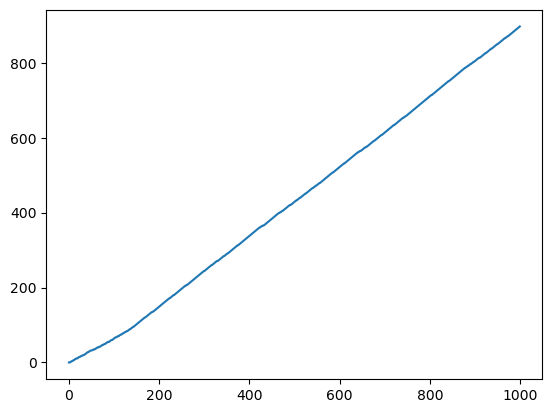

In [102]:
import matplotlib.pyplot as plt

plt.plot(total_rewards)

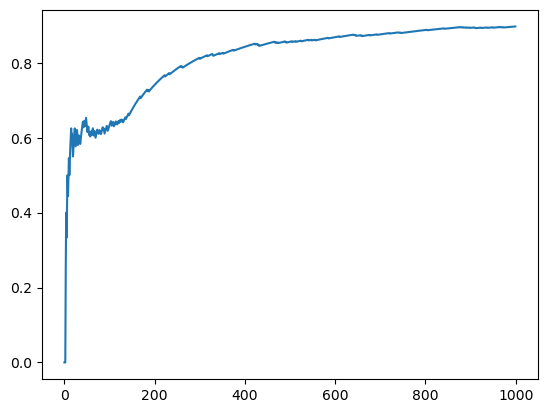

In [103]:
import matplotlib.pyplot as plt

plt.plot(total_rates)

In [104]:
total_reward

897

In [114]:
# 클래스 여러개의 함수를 저장해놓는 주머니 같은 아잉
class Game:
    def __init__(self):
        self.arms=np.random.rand(10)
        
    #승리할 경우
    def play(self, arm):
        
        # 플레이할 때마다 노이즈를 줌(기계의 확률을 수정)
        # np.random.randn() 음수값도 나올 수 있음
        self.arms += np.random.randn(10)*0.1
        
        if np.random.rand()<self.arms[arm]:
            return 1
        else:
            return 0
        

# Qm = (R1+R2+,,,+Rn)/n
# R 은 0 과 1 (숫자는 횟수)
# Q 는 현재 게임 슬롯의 추정 확률

# 첫 Q 는 0
# n=1 R이 실패할 경우, 0 -> Q1= (0)/1 = 0
# n=2 R이 이길 경우, 1 -> Q2 = (0+1)/2 = 0.5


class Player:
    def __init__(self):
        self.Qs = np.zeros(10)
        self.Ns = np.zeros(10)
        
    
    def update(self, action, reward):
        # 몇 번째 게임기를 썼는지 더해주는
        self.Ns[action] +=1
        self.Qs[action] = self.Qs[action] + (reward-self.Qs[action]) * 0.8
    
    
    # 탐욕법으로 적용
    def get_action(self):
        # 주어진 게임 슬롯에 대한 승률이 0.1 보다 낮게 된다면, 다른 게임기로 가라
        # 원랜 0번째만  적용하는 건데, 지금 랜덤으로 변경해주는 것
        # 운 나쁘게 같은 게임기 번호를 선정될수도 있지만, 
        if np.random.rand() < 0.1:
            return np.random.randint(0,10)
        
        # 높은 확률을 보였던 게임기 계속 써
        return np.argmax(self.Qs)
    

In [115]:
# 게임장을 열었고 10개 슬롯
game = Game()

# 플레이어가 들어왔다
player = Player()

total_reward=0
total_rewards=[] # 얻었는지 안얻었는지 보상
total_rates = [] # 승률

for n in range(1000):
    action=player.get_action()
    reward = game.play(action)
    
    # 플레이어에게 어떤  슬롯이 좋고 나빴는지에 대해 알려주는
    player.update(action, reward)
    
    total_reward+= reward
    total_rewards.append(total_reward)
    total_rates.append(total_reward/(n+1))

In [116]:
total_reward

829

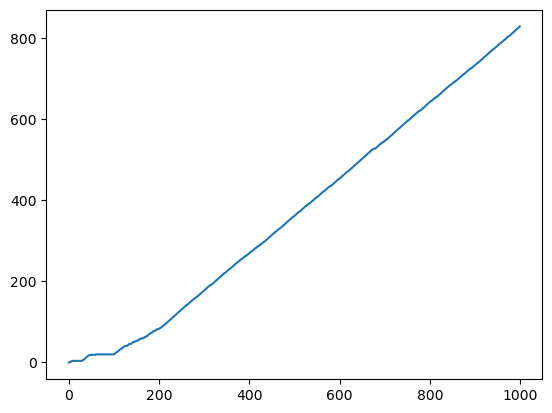

In [117]:
import matplotlib.pyplot as plt

plt.plot(total_rewards)

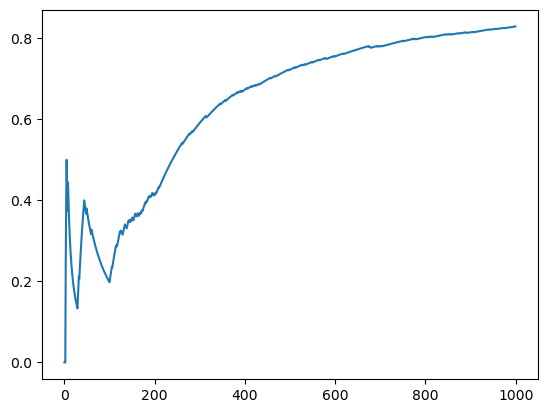

In [118]:
import matplotlib.pyplot as plt

plt.plot(total_rates)